# Bikeshare Membership Classification

In 2016, Cyclistic successfully launched a bike-sharing service in Chicago, boasting a fleet of over 5,800 bikes. In order to accommodate a diverse range of riders, Cyclistic offers three distinct pricing plans: the Single-Ride Pass, the Full-Day Pass, and the Annual Membership. These options cater to two primary types of riders: the casual riders, who typically prefer the single-ride or full-day passes, and the members, who opt for the convenience of an annual membership.

The primary objective of the Director of Marketing is to encourage casual riders to make the transition into becoming annual members. In pursuit of this goal, a comprehensive report has been generated to gain insights into the riding patterns and behaviors of Cyclistic customers. As a member of the data analytics team, my responsibility is to analyze and discern the differences in how casual riders and annual members utilize the Cyclistic service.

GOAL: build Machine Learning models to classify whether bike share users will purchase mambership options oe not, using 5 different ML models & advanced feature engineering techniques with Python ScikitLearn.

## Setting up

In [1]:
import datetime as dt
import pandas as pd
import matplotlib as mayplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_202101 = pd.read_csv('/Users/asamitakeuchi/Bike/202101-divvy-tripdata.csv')
df_202102 = pd.read_csv('/Users/asamitakeuchi/Bike/202102-divvy-tripdata.csv')
df_202103 = pd.read_csv('/Users/asamitakeuchi/Bike/202103-divvy-tripdata.csv')
df_202104 = pd.read_csv('/Users/asamitakeuchi/Bike/202104-divvy-tripdata.csv')
df_202105 = pd.read_csv('/Users/asamitakeuchi/Bike/202105-divvy-tripdata.csv')
df_202106 = pd.read_csv('/Users/asamitakeuchi/Bike/202106-divvy-tripdata.csv', on_bad_lines='skip')
df_202107 = pd.read_csv('/Users/asamitakeuchi/Bike/202107-divvy-tripdata.csv')
df_202108 = pd.read_csv('/Users/asamitakeuchi/Bike/202108-divvy-tripdata.csv')
df_202109 = pd.read_csv('/Users/asamitakeuchi/Bike/202109-divvy-tripdata.csv')
df_202110 = pd.read_csv('/Users/asamitakeuchi/Bike/202110-divvy-tripdata.csv')
df_202111 = pd.read_csv('/Users/asamitakeuchi/Bike/202111-divvy-tripdata.csv')
df_202112 = pd.read_csv('/Users/asamitakeuchi/Bike/202112-divvy-tripdata.csv')

In [3]:
#merge datasets from each month
Y_2021 = [df_202101, df_202102, df_202103, df_202104, df_202105, df_202106, df_202107, df_202108, df_202109, df_202110, df_202111, df_202112]
df_2021 = pd.concat(Y_2021)

## Checking and Cleaning the Data

In [4]:
df_2021.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.9,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.9,-87.7,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.9,-87.7,casual


In [5]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6190892 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           object 
 10  end_lat             object 
 11  end_lng             object 
 12  member_casual       object 
dtypes: float64(1), object(12)
memory usage: 661.3+ MB


In [6]:
#check null data
def check_if_null(df):
    null = df.isnull().sum()
    null_percent = (df.isnull().sum()/df.count()*100).round(2)
    null_values = pd.concat([null, null_percent], axis = 1)
    null_values.columns = ['Null Values', '%Null']
    return null_values

check_if_null(df_2021)

,Null Values,%Null
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00
start_station_name,759565,13.98
start_station_id,759563,13.98
end_station_name,813885,15.14
end_station_id,813886,15.14
start_lat,4,0.00
start_lng,4,0.00


In [7]:
#drop null values 
df_2021_cleaned = df_2021.dropna().reset_index()

In [8]:
df_2021_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076073 entries, 0 to 5076072
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   index               int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           object 
 11  end_lat             object 
 12  end_lng             object 
 13  member_casual       object 
dtypes: float64(1), int64(1), object(12)
memory usage: 542.2+ MB


In [9]:
#start_station_id, end_station_id, start_lng, end_lat, end_lng are misclassified as object
#Going to change them to numeric values float64/ int64
cols = ['start_lng', 'end_lat', 'end_lng']
for col_name in cols:
    df_2021_cleaned[col_name] = pd.to_numeric(df_2021_cleaned[col_name], errors='coerce')

df_2021_cleaned.dtypes

index                   int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [10]:
df_2021_cleaned.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member
1,10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member
2,11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual
3,12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual
4,13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual


In [11]:
#create columns 'trip_duration', 'week_day', and 'month'
df_2021_cleaned.loc[:, 'started_at'] = pd.to_datetime(df_2021_cleaned.loc[:, 'started_at'])
df_2021_cleaned.loc[:, 'ended_at'] = pd.to_datetime(df_2021_cleaned.loc[:, 'ended_at'])

df_2021_cleaned.loc[:, 'trip_duration'] = df_2021_cleaned.loc[:, 'ended_at'] - df_2021_cleaned.loc[:, 'started_at']
df_2021_cleaned.loc[:, 'week_day'] = df_2021_cleaned.loc[:, 'started_at'].dt.day_name()
df_2021_cleaned.loc[:, 'month'] = df_2021_cleaned.loc[:, 'started_at'].dt.month
df_2021_cleaned.loc[:, 'time_start'] = df_2021_cleaned.loc[:, 'started_at'].dt.time
#Change the trip_duration to mins
df_2021_cleaned['trip_duration_mins'] = df_2021_cleaned['trip_duration'].dt.total_seconds() / 60
df_2021_cleaned.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,week_day,month,time_start,trip_duration_mins
0,9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,0 days 00:07:13,Sunday,1,19:15:38,7.216667
1,10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,0 days 00:04:32,Saturday,1,12:57:38,4.533333
2,11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,0 days 00:09:47,Saturday,1,15:28:04,9.783333
3,12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,0 days 00:08:57,Saturday,1,15:28:57,8.950000
4,13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,0 days 00:10:09,Sunday,1,15:56:59,10.150000


In [12]:
df_2021_cleaned.isnull().sum()

index                 0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
trip_duration         0
week_day              0
month                 0
time_start            0
trip_duration_mins    0
dtype: int64

In [13]:
df_2021_cleaned['start_station_name'].unique()

array(['California Ave & Cortez St', 'Halsted St & North Branch St',
       'Glenwood Ave & Touhy Ave', 'Michigan Ave & 8th St',
       'Shedd Aquarium', 'Sedgwick St & North Ave',
       'Rush St & Hubbard St', 'Campbell Ave & Montrose Ave',
       'State St & Harrison St', 'Sheffield Ave & Fullerton Ave',
       'State St & Pearson St', 'Damen Ave & Leland Ave',
       '2112 W Peterson Ave', 'St. Clair St & Erie St',
       'Southport Ave & Wellington Ave', 'Indiana Ave & Roosevelt Rd',
       'Lincoln Park Conservatory', 'Clark St & Armitage Ave',
       'Wood St & Augusta Blvd', 'Calumet Ave & 35th St',
       'Halsted St & Roscoe St', 'Wood St & Chicago Ave',
       'Kedzie Ave & Milwaukee Ave', 'Larrabee St & Division St',
       'Damen Ave & Cortland St', 'Halsted St & Archer Ave',
       'Honore St & Division St', 'LaSalle Dr & Huron St',
       'Lincoln Ave & Addison St', 'Cityfront Plaza Dr & Pioneer Ct',
       'Ogden Ave & Chicago Ave', 'Drake Ave & Montrose Ave',
       'R

In [14]:
df_2021_cleaned.groupby('month').start_station_name.size()

month
1       83509
2       42996
3      205691
4      298207
5      450994
6     1096549
7      692321
8      674409
9      621150
10     477972
11     255904
12     176371
Name: start_station_name, dtype: int64

In [15]:
df_2021_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076073 entries, 0 to 5076072
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   index               int64          
 1   ride_id             object         
 2   rideable_type       object         
 3   started_at          datetime64[ns] 
 4   ended_at            datetime64[ns] 
 5   start_station_name  object         
 6   start_station_id    object         
 7   end_station_name    object         
 8   end_station_id      object         
 9   start_lat           float64        
 10  start_lng           float64        
 11  end_lat             float64        
 12  end_lng             float64        
 13  member_casual       object         
 14  trip_duration       timedelta64[ns]
 15  week_day            object         
 16  month               int64          
 17  time_start          object         
 18  trip_duration_mins  float64        
dtypes: datetime64[ns](2),

In [ ]:
df_2021_cleaned.to_csv('2021_cleaned_final.csv'
             , header=True
             , index=False
             , chunksize=100000
             , encoding='utf-8')


# Data Visualization

In [58]:
#hitorical ride - member v casual
#%member vs casual
#usage of biketype
#monthly ride
#ride by time - hist
#Ride - morning, afternoon, night, early morning
#start_station/end_station
df_2021_cleaned.groupby('member_casual').size()

member_casual
casual    2298839
member    2777234
dtype: int64

([<matplotlib.patches.Wedge at 0x7f98ee268e80>,
 [Text(-1.0879683142721241, 0.162249644498448, 'casual'),
  Text(1.087968314272124, -0.16224964449844861, 'member')],
 [Text(-0.5934372623302495, 0.08849980609006254, '45.3%'),
  Text(0.5934372623302494, -0.08849980609006287, '54.7%')])

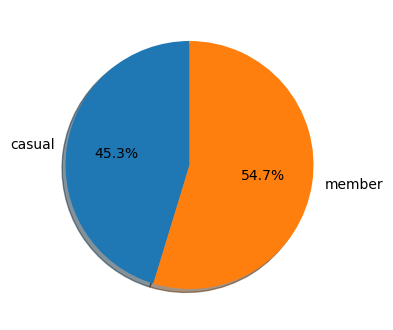

In [26]:
## of member vs casual
member_casual = df_2021_cleaned.groupby('member_casual').size()
labels = ['casual', 'member']

fig, ax = plt.subplots(figsize=(4,6))
ax.pie(member_casual, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [33]:
#usage by biketypes
df_2021_cleaned['rideable_type'].value_counts()

classic_bike     3590596
electric_bike    1133264
docked_bike       352213
Name: rideable_type, dtype: int64

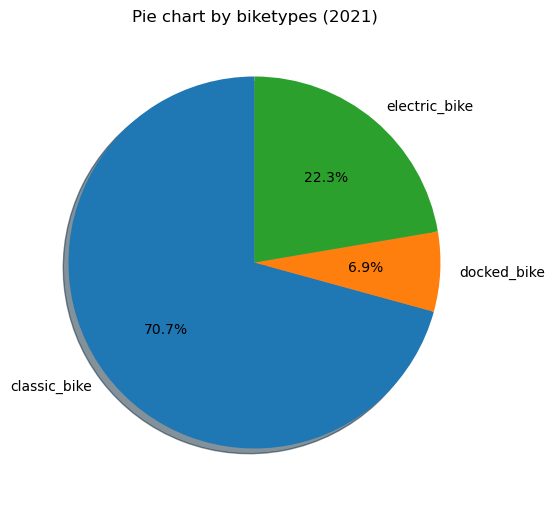

In [37]:
#usage by biketypes
types=df_2021_cleaned.groupby('rideable_type').size()
labels = ['classic_bike','docked_bike','electric_bike']

fig, ax = plt.subplots(figsize=(6,8))
_=plt.pie(types, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Pie chart by biketypes (2021)')
plt.show()

In [ ]:
#Stacked bar chart for bike types

In [ ]:
#histogram of Member vs Casual by month
member_2021 = df_2021_cleaned.loc[df_2021_cleaned.member_casual=='member', 'month']
casual_2021 = df_2021_cleaned.loc[df_2021_cleaned.member_casual=='casual', 'month']

fig, ax = plt.subplots(figsize=(6,8))
_=plt.hist(member_2021, bins = 12, alpha=1.0, color='orange', label='Member')
_=plt.hist(casual_2021, bins = 12, alpha=0.7, color='blue', label='Casual')
ax.legend()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Member and Casual Riders by Month (2021)')
plt.show()

Membership riders are more frequently using than casual riders for most of the season, betweem January and may, and September and December.

Casual members surpass the number of membership users from June to August.
Overall, there are more riders from spring to fall.
Let's compare this to the weather data from Chicago in 2021, which is retrieved from: https://www.weather.gov/wrh/Climate?wfo=lot

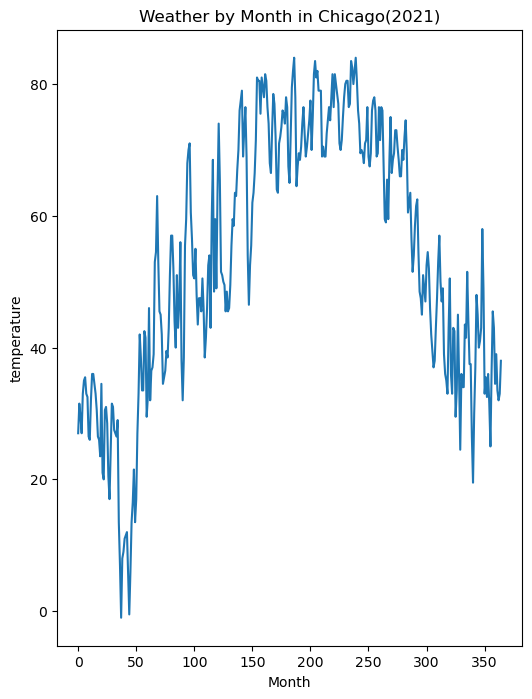

In [10]:
Chicago_weather_21 = pd.read_csv('/Users/asamitakeuchi/Bike/Chicago_weather_2021.csv')

fig, ax = plt.subplots(figsize=(6,8))
_=plt.plot(Chicago_weather_21['Average'])

plt.xlabel('Month')
plt.ylabel('temperature')
plt.title('Weather by Month in Chicago(2021)')
plt.show()

It seems that the overall historical trends of both casual and membership users alighn with the weather of Chicago that year.

In [38]:
#Member vs Casual by week day
df_2021_cleaned.groupby(['week_day','member_casual']).size()

week_day   member_casual
Friday     casual           325646
           member           397077
Monday     casual           251980
           member           375611
Saturday   casual           520457
           member           387494
Sunday     casual           452439
           member           341145
Thursday   casual           251447
           member           406087
Tuesday    casual           246523
           member           428872
Wednesday  casual           250347
           member           440948
dtype: int64

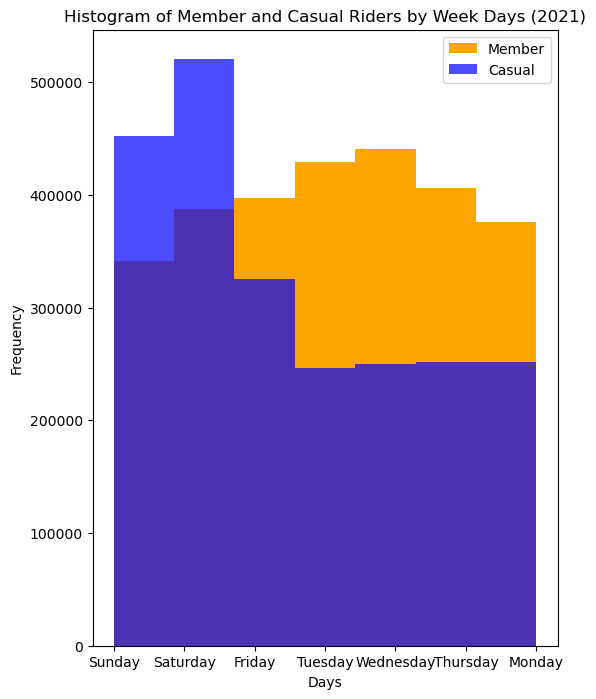

In [39]:
#histogram of Member vs Casual by week day
member_2021_days = df_2021_cleaned.loc[df_2021_cleaned.member_casual=='member', 'week_day']
casual_2021_days = df_2021_cleaned.loc[df_2021_cleaned.member_casual=='casual', 'week_day']
bin_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(figsize=(6,8))
_=plt.hist(member_2021_days, bins = 7, alpha=1.0, color='orange', label='Member')
_=plt.hist(casual_2021_days, bins = 7, alpha=0.7, color='blue', label='Casual')
ax.legend()
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Member and Casual Riders by Week Days (2021)')
plt.show()

From the chart above, there is a clear tendency that membership users use more frequently during the weekdays while casual users use more on weekends.

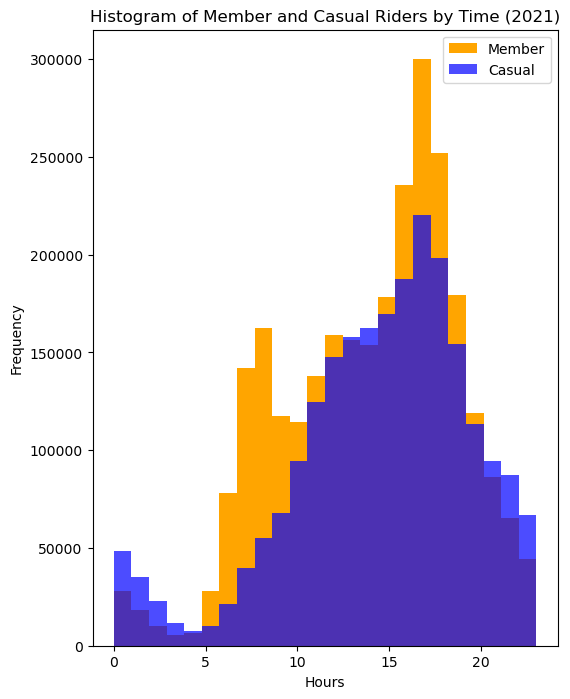

In [40]:
#ride by time
member_2021_time = df_2021_cleaned.loc[df_2021_cleaned.member_casual=='member', 'time_start']
casual_2021_time = df_2021_cleaned.loc[df_2021_cleaned.member_casual=='casual', 'time_start']

# Convert datetime.time objects to numerical values (hour of the day)
member_hours = [time.hour for time in member_2021_time]
casual_hours = [time.hour for time in casual_2021_time]

fig, ax = plt.subplots(figsize=(6,8))
_=plt.hist(member_hours, bins = 24, alpha=1.0, color='orange', label='Member')
_=plt.hist(casual_hours, bins = 24, alpha=0.7, color='blue', label='Casual')
ax.legend()
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Member and Casual Riders by Time (2021)')
plt.show()

From the visualization, you can see that there are more membership users in the morning hours (5AM - 9AM) and afternoon hours (4PM - 7PM). This fact suggests that people with membership are using more for commuting.
On the other hand, casual users are using the bikes slightly more for late night hours(9PM - 12PM) and early mornig hours(12PM - 4AM).

In [49]:
#Check the data for Trip duration
df_2021_cleaned['trip_duration_mins'].describe().round(2)

count    5076073.00
mean          22.21
std          196.27
min          -55.90
25%            7.03
50%           12.35
75%           22.35
max        55944.15
Name: trip_duration_mins, dtype: float64

The average duration is 22.21 mins and the media duration is 12.35 mins. 
The 25% is 7.03 mins and 75% is 22.35 mins.

Apaprently  there are data with minus durations..

In [51]:
#Apparently there are data with minus duration
minus_duration = df_2021_cleaned[df_2021_cleaned.trip_duration_mins < 0]

print('The number of rows with mius duration is:', minus_duration.size)
minus_duration[:10]

The number of rows with mius duration is: 2242


,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,week_day,month,time_start,trip_duration_mins
165816,39317,F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,13249,Ashland Ave & Belle Plaine Ave,13249,41.956133,-87.668981,41.956143,-87.668985,member,-1 days +23:59:59,Monday,3,15:41:21,-0.016667
239546,120830,5D2797A8FFA71B49,classic_bike,2021-03-13 18:02:58,2021-03-13 18:02:57,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,casual,-1 days +23:59:59,Saturday,3,18:02:58,-0.016667
350664,22361,BC53ECCBC76278FD,classic_bike,2021-04-07 16:11:33,2021-04-07 16:11:26,Ashland Ave & Grand Ave,13434,Ashland Ave & Grand Ave,13434,41.891072,-87.666611,41.891072,-87.666611,member,-1 days +23:59:53,Wednesday,4,16:11:33,-0.116667
585980,292566,6E81034B446FC2FD,electric_bike,2021-04-23 09:43:39,2021-04-23 09:43:29,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910638,-87.649372,41.910650,-87.649386,member,-1 days +23:59:50,Friday,4,09:43:39,-0.166667
586092,292678,318DD838369AEA61,classic_bike,2021-04-30 10:56:32,2021-04-30 10:56:30,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,member,-1 days +23:59:58,Friday,4,10:56:32,-0.033333
586447,293033,8ADD13BD8F6A7567,classic_bike,2021-04-17 12:43:36,2021-04-17 12:43:27,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,member,-1 days +23:59:51,Saturday,4,12:43:36,-0.150000
910218,313131,3EC1B5A4D4B9AB99,classic_bike,2021-05-05 16:10:04,2021-05-05 16:09:51,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,member,-1 days +23:59:47,Wednesday,5,16:10:04,-0.216667
1086113,15342,732D84DAD2CC9B73,classic_bike,2021-06-20 10:52:26,2021-06-20 10:52:25,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.871467,-87.640949,41.871467,-87.640949,casual,-1 days +23:59:59,Sunday,6,10:52:26,-0.016667
1179048,112361,A18D39992AA99793,classic_bike,2021-06-15 20:58:03,2021-06-15 20:54:51,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952833,-87.649993,41.952833,-87.649993,casual,-1 days +23:56:48,Tuesday,6,20:58:03,-3.200000
1896110,973318,24C4FC421D642C22,classic_bike,2021-06-28 13:18:26,2021-06-28 13:18:25,Mies van der Rohe Way & Chicago Ave,13338,Mies van der Rohe Way & Chicago Ave,13338,41.896910,-87.621743,41.896910,-87.621743,member,-1 days +23:59:59,Monday,6,13:18:26,-0.016667


In [42]:
dur_over40000 = df_2021_cleaned[df_2021_cleaned.trip_duration_mins >= 40000]
dur_over40000.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,week_day,month,time_start,trip_duration_mins
341692,10047,E84DF812305C9C9F,docked_bike,2021-04-02 17:50:00,2021-05-05 22:06:42,Wabash Ave & Wacker Pl,TA1307000131,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886875,-87.626030,41.889955,-87.680651,casual,33 days 04:16:42,Friday,4,17:50:00,47776.700000
672220,46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,37 days 10:41:36,Sunday,5,02:56:07,53921.600000
1191356,124714,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,36 days 14:21:23,Saturday,6,23:33:51,52701.383333
1870294,945771,E7FC85C69101AF97,docked_bike,2021-06-11 13:35:42,2021-07-09 13:36:16,Central Ave & Harrison St,16915,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.872993,-87.764499,41.889955,-87.680651,casual,28 days 00:00:34,Friday,6,13:35:42,40320.566667
1871408,946885,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,38 days 16:11:41,Friday,6,22:03:33,55691.683333


<Axes: >

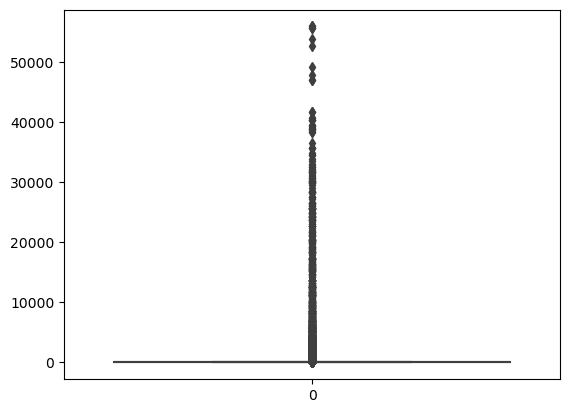

In [43]:
sns.boxplot(df_2021_cleaned['trip_duration_mins'])

The data is highly dispersed, ranging from -1 min to over 50,000 mins.
SO first, I am going to plot the duration of users who return the bike within 24 hours (1,440 mins).

In [44]:
#separate the data the are <= 1,440 mins
twenty_four_hrs = df_2021_cleaned['trip_duration_mins'] <= 1440

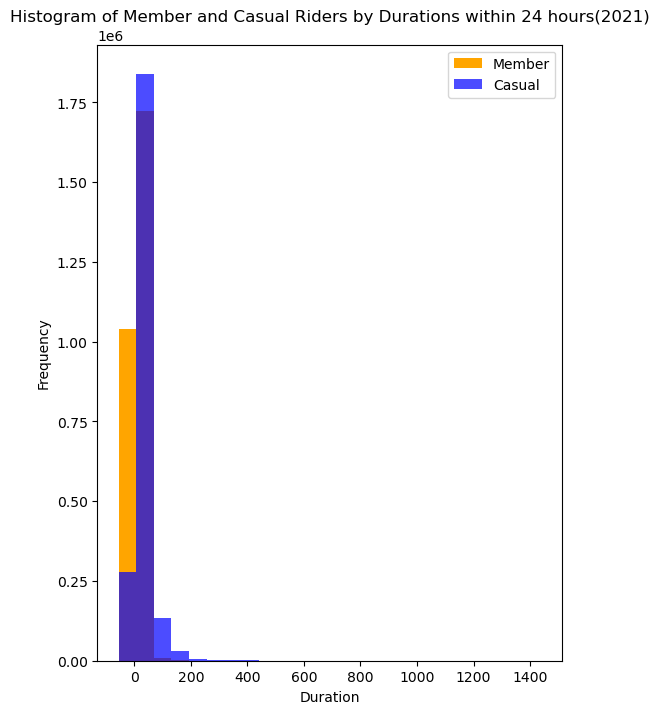

In [45]:
#histogram of Member vs Casual by trip_duration within 24 hours
member_2021_duration_24 = df_2021_cleaned.loc[twenty_four_hrs & (df_2021_cleaned['member_casual'] == 'member'), 'trip_duration_mins']
casual_2021_duration_24 = df_2021_cleaned.loc[twenty_four_hrs & (df_2021_cleaned['member_casual'] == 'casual'), 'trip_duration_mins']
fig, ax = plt.subplots(figsize=(6,8))
_=plt.hist(member_2021_duration_24, bins = 24, alpha=1.0, color='orange', label='Member')
_=plt.hist(casual_2021_duration_24, bins = 24, alpha=0.7, color='blue', label='Casual')
ax.legend()
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Member and Casual Riders by Durations within 24 hours(2021)')
plt.show()